# Telecom Churn - ML Group Case Study

In [1]:
# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

# Import the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_columns',230)

In [2]:
# reading the input data and preview
churn= pd.read_csv('telecom_churn_data.csv')
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
print (churn.shape)
print (churn.info())
churn.describe()

(99999, 226)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [4]:
print ("The cutomer-level information for each customer is represented by %d features"% (churn.shape[1]))
# getting the unique number of custormers from the data
print ("Unique customers/MSISDN in the data: %d"%len(churn.mobile_number.unique()))

The cutomer-level information for each customer is represented by 226 features
Unique customers/MSISDN in the data: 99999


In [5]:
#list of columns
pd.DataFrame(churn.columns)

,0
0,mobile_number
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
...,...
221,aon
222,aug_vbc_3g
223,jul_vbc_3g
224,jun_vbc_3g


---
##  Data Cleaning

---

Custome function Defination for data cleaning

In [6]:
def getMissingValues(missingCutoff):
    # Function to retun the columns with more than missingCutoff% missing values.
    # argument: missingCutoff, % values threshold for missing values
    missing = round(100*(churn.isnull().sum()/churn.shape[0]))
    print("There are {} features having more than {}% missing values/entries".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]

In [7]:
def imputeNan(data,imputeColList=False,missingColList=False):
    # Function impute the nan with 0
    # argument: colList, list of columns for which nan is to be replaced with 0
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8','_9'] for y in imputeColList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            data[col].fillna(0, inplace=True)

##### Handling missing data
Let's check for missing values in the data.

In [8]:
# Missing values per column expressed as % of total number of values
getMissingValues(50)

There are 40 features having more than 50% missing values/entries


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

Out the these 40 features, many are required and are essential for analysis. The missing values for these features seems to suggest that these customers KPI's did not have any value at that month. We can choose to impute these values with 0 to make enable these features to give value to analysis.

In [9]:
# Since av_rech_amt_data_* features are important for getting the high-value customers,
#lets impute the missing av_rech_amt_data_* with 0
imputeCol = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user']
imputeNan(churn,imputeCol)

In [10]:
getMissingValues(50)

There are 4 features having more than 50% missing values/entries


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
dtype: float64

In [11]:
# dropping the columns having more than 50% missing values
missingcol = list(getMissingValues(50).index)
churn.drop(missingcol,axis=1,inplace=True)
churn.shape

There are 4 features having more than 50% missing values/entries


(99999, 222)

In [12]:
# Missing values per column expressed as % of total number of values > 5%
getMissingValues(5) 

There are 29 features having more than 5% missing values/entries


onnet_mou_9         8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
roam_og_mou_9       8.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
loc_og_mou_9        8.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2c_mou_9    8.0
std_og_mou_9        8.0
isd_og_mou_9        8.0
spl_og_mou_9        8.0
og_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_9        8.0
std_ic_t2t_mou_9    8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_t2o_mou_9    8.0
std_ic_mou_9        8.0
spl_ic_mou_9        8.0
isd_ic_mou_9        8.0
ic_others_9         8.0
dtype: float64

Looks like all these features for the month sep(9) are missing together. Let's check.

In [13]:
# checking if all these above features go missing together since they have the same 8% missing values in each feature.
missingcol = list(getMissingValues(5).index)
print ("There are %d customers/MSISDN's having missing values for %s together"%(len(churn[churn[missingcol].isnull().all(axis=1)]),missingcol))
churn[churn[missingcol].isnull().all(axis=1)][missingcol].head()

There are 29 features having more than 5% missing values/entries
There are 7745 customers/MSISDN's having missing values for ['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9'] together


,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,...,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Yes, It looks like for **7745 Customers** all these features are empty together without any value. We can choose to impute these values with 0 also.

In [14]:
imputeNan(churn,missingColList=missingcol)

In [15]:
churn=churn[~churn[missingcol].isnull().all(axis=1)]
churn.shape

(99999, 222)

In [16]:
# Missing values per column expressed as % of total number of values
getMissingValues(2)

There are 89 features having more than 2% missing values/entries


onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
                      ... 
ic_others_6            4.0
ic_others_7            4.0
ic_others_8            5.0
date_of_last_rech_8    4.0
date_of_last_rech_9    5.0
Length: 89, dtype: float64

In [17]:
missingcol = list(getMissingValues(2).index)
print ("There are %d customers/MSISDN's having missing values for %s together"%(len(churn[churn[missingcol].isnull().all(axis=1)]),missingcol))
churn[churn[missingcol].isnull().all(axis=1)][missingcol].head()

There are 89 features having more than 2% missing values/entries
There are 381 customers/MSISDN's having missing values for ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_othe

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Yes, It looks like there are **381 Customers** for whom **all** these features are without any value.
Let's drop these customers from the data. 

In [18]:
churn=churn[~churn[missingcol].isnull().all(axis=1)]
churn.shape

(99618, 222)

In [19]:
# For other customers where these missing values are spread out, let's impute them with zero. 

missingcol.remove('date_of_last_rech_8')
missingcol.remove('date_of_last_rech_9')
imputeNan(churn,missingColList=missingcol)

In [20]:
# Missing values per column expressed as % of total number of values
getMissingValues(0)

There are 9 features having more than 0% missing values/entries


loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_6     1.0
date_of_last_rech_7     1.0
date_of_last_rech_8     3.0
date_of_last_rech_9     4.0
dtype: float64

In [21]:
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
for c in col: 
    print("Unique values in column %s are %s" % (c,churn[c].unique()))
                                                 

Unique values in column loc_og_t2o_mou are [ 0. nan]
Unique values in column std_og_t2o_mou are [ 0. nan]
Unique values in column loc_ic_t2o_mou are [ 0. nan]
Unique values in column last_date_of_month_7 are ['7/31/2014' nan]
Unique values in column last_date_of_month_8 are ['8/31/2014' nan]
Unique values in column last_date_of_month_9 are ['9/30/2014' nan]
Unique values in column date_of_last_rech_7 are ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
Unique values in column date_of_last_rech_8 are ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/2014'
 '8/25/2014' '8/19/2014' '

In [22]:
#Some of these features take only one value. Lets impute their missing values in these features with the mode
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for c in col:
    print(churn[c].value_counts())
    churn[c].fillna(churn[c].mode()[0], inplace=True)
print("All the above features take only one value. Lets impute the missing values in these features with the mode")


0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
7/31/2014    99300
Name: last_date_of_month_7, dtype: int64
8/31/2014    98867
Name: last_date_of_month_8, dtype: int64
9/30/2014    98321
Name: last_date_of_month_9, dtype: int64
All the above features take only one value. Lets impute the missing values in these features with the mode


In [23]:
# Missing values per column expressed as % of total number of values
getMissingValues(0)

There are 4 features having more than 0% missing values/entries


date_of_last_rech_6    1.0
date_of_last_rech_7    1.0
date_of_last_rech_8    3.0
date_of_last_rech_9    4.0
dtype: float64

In [24]:
# All these features are missing together
missingcol = list(getMissingValues(0).index)
print ("There are %d rows in total having missing values for these variables."%(len(churn[churn[missingcol].isnull().all(axis=1)])))

There are 4 features having more than 0% missing values/entries
There are 22 rows in total having missing values for these variables.


In [25]:
churn[churn['date_of_last_rech_6'].isnull()]['date_of_last_rech_6'] = '6/30/2014'
churn[churn['date_of_last_rech_7'].isnull()]['date_of_last_rech_7'] = '7/31/2014'
churn[churn['date_of_last_rech_8'].isnull()]['date_of_last_rech_8'] = '8/31/2014'
churn[churn['date_of_last_rech_9'].isnull()]['date_of_last_rech_9'] = '9/30/2014'

<br><br>Let's look for columns having all values as 0.

In [26]:
zero_columns=churn.columns[(churn == 0).all()]
print ("There are {} features which has only 0 as values. These features are \n{}".format(len(zero_columns),zero_columns))

There are 11 features which has only 0 as values. These features are 
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')


In [27]:
# Let's remove these columns as well. All take a single value '0'. 
churn.drop(zero_columns,axis=1,inplace=True)

In [28]:
# Percentage of data left after removing the missing values.
print("Percentage of data remaining after treating missing values: {}%".format(round(churn.shape[0]/99999 *100,2)))
print ("Number of customers: {}".format(churn.shape[0]))
print ("Number of features: {}".format(churn.shape[1]))

Percentage of data remaining after treating missing values: 99.62%
Number of customers: 99618
Number of features: 211


##### Fixing data types and columns names

Let's check for data types of the different columns.

In [29]:
churn.reset_index(inplace=True,drop=True)
# list of all columns which store date
date_columns = list(churn.filter(regex='date').columns)
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [30]:
# Converting dtype of date columns to datetime
for col in date_columns:
    churn[col] = pd.to_datetime(churn[col], format='%m/%d/%Y')

In [31]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99618 entries, 0 to 99617
Columns: 211 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(168), int64(35)
memory usage: 160.4 MB


<br><br> There are some monthly features which are not in the standard naming (\_6,\_7,\_8,\_9)

In [32]:
# renaming columns,
#'jun_vbc_3g' : 'vbc_3g_6'
#'jul_vbc_3g' : 'vbc_3g_7'
#'aug_vbc_3g' : 'vbc_3g_8'
#'sep_vbc_3g' : 'vbc_3g_9'
churn.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

**Creating new feature:** 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9'

These will store the total data volume (= vol_2g_mb_* + vol_3g_mb_*) used by user.

In [33]:
#Creating new feature: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9',
for i in range(6,10):
    churn['vol_data_mb_'+str(i)] = (churn['vol_2g_mb_'+str(i)]+churn['vol_3g_mb_'+str(i)]).astype(int)

###### Filter high-value customers
Defining high-value customers as follows: 

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [34]:
rechcol = churn.filter(regex=('count')).columns
churn[rechcol].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Creating new feature:** avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9

These will store the average recharge value for each customer for every month

In [35]:
# Creating new feature: avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9
for i in range(6,10):
    churn['avg_rech_amt_'+str(i)] = round(churn['total_rech_amt_'+str(i)]/churn['total_rech_num_'+str(i)]+1,2)

In [36]:
imputeNan(churn,missingColList=['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8','avg_rech_amt_9'])

**Creating new feature:** total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9

These will store the total number of data recharge (=count_rech_2g + count_rech_3g ) for each month.

In [37]:
#Creating new feature: total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9
for i in range(6,10):
    churn['total_rech_num_data_'+str(i)] = (churn['count_rech_2g_'+str(i)]+churn['count_rech_3g_'+str(i)]).astype(int)

**Creating new feature:** total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9

These will store the total amount of data recharge (=total_rech_num_data * av_rech_amt_data ) for each month.

In [38]:
#Creating new feature: total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
for i in range(6,10):
    churn['total_rech_amt_data_'+str(i)] = churn['total_rech_num_data_'+str(i)]*churn['av_rech_amt_data_'+str(i)]

**Creating new feature:** total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9

These will store the total recharge amount (= total_rech_amt + total_rech_amt_data ) for each customer, for each month.

In [39]:
#Creating new feature: total_mon_rech_6,total_mon_rech_7,total_mon_rech_8,total_mon_rech_9
for i in range(6,10):
    churn['total_month_rech_'+str(i)] = churn['total_rech_amt_'+str(i)]+churn['total_rech_amt_data_'+str(i)]
churn.filter(regex=('total_month_rech')).head()

,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9
0,614.0,504.0,504.0,0.0
1,74.0,538.0,383.0,121.0
2,168.0,315.0,116.0,404.0
3,230.0,310.0,601.0,410.0
4,252.0,350.0,287.0,200.0


In [40]:
# calculating the avegare of first two months (good phase) total monthly recharge amount
avg_goodPhase =(churn.total_month_rech_6 + churn.total_month_rech_7)/2
# finding the cutoff which is the 70th percentile of the good phase average recharge amounts
hv_cutoff= np.percentile(avg_goodPhase,70)
# Filtering the users whose good phase avg. recharge amount >= to the cutoff of 70th percentile.
hv_users = churn[avg_goodPhase >=  hv_cutoff]
hv_users.reset_index(inplace=True,drop=True)

print("Number of High-Value Customers in the Dataset: %d\n"% len(hv_users))
print("Percentage High-value users in data : {}%".format(round(len(hv_users)/churn.shape[0]*100),2))

Number of High-Value Customers in the Dataset: 29906

Percentage High-value users in data : 30%


###### Tagging Churners
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows:

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [41]:
def getChurnStatus(data,churnPhaseMonth=9):
    # Function to tag customers as churners (churn=1, else 0) based on 'vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_'
    #argument: churnPhaseMonth, indicating the month number to be used to define churn (default= 9)
    churn_features= ['vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_']
    flag = ~data[[s + str(churnPhaseMonth) for s in churn_features ]].any(axis=1)
    flag = flag.map({True:1, False:0})
    return flag

In [42]:
hv_users['churn'] = getChurnStatus(hv_users,9)
print("There are {} users tagged as churners out of {} High-Value Customers.".format(len(hv_users[hv_users.churn == 1]),hv_users.shape[0]))
print("High-value Churn Percentage : {}%".format(round(len(hv_users[hv_users.churn == 1])/hv_users.shape[0] *100,2)))


There are 2418 users tagged as churners out of 29906 High-Value Customers.
High-value Churn Percentage : 8.09%


<br>There are just **8.09% churn** cases.
<br>This indicated an **highly imbalanced** data set where the churn cases are the minority(8.14%) as opposed to the non-churners who are the majority(91.91)

---
##  Data Analysis

---

Define few methods to aid in plotting graphs

In [43]:
# Function to plot the histogram with labels
# https://stackoverflow.com/questions/6352740/matplotlib-label-each-bin
def plot_hist(dataset,col,binsize):
    fig, ax = plt.subplots(figsize=(20,4))
    counts, bins, patches = ax.hist(dataset[col],bins=range(0,dataset[col].max(),round(binsize)), facecolor='lightgreen', edgecolor='gray')
    
    # Set the ticks to be at the edges of the bins.
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        # Label the percentages
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    ax.set_xlabel(col.upper())
    ax.set_ylabel('Count')
    # Give ourselves some more room at the bottom of the plot
    #plt.subplots_adjust(bottom=0.15)
    plt.show()
    

In [44]:
def plot_avgMonthlyCalls(pltType,data,calltype,colList):
    # style
    plt.style.use('seaborn-darkgrid')
    # create a color palette
    palette = plt.get_cmap('Set1')
    
    if pltType == 'multi':
        #Create dataframe after grouping on AON with colList features
        total_call_mou = pd.DataFrame(data.groupby('aon_bin',as_index=False)[colList].mean())
        total_call_mou['aon_bin']=pd.to_numeric(total_call_mou['aon_bin'])
        total_call_mou
        # multiple line plot
        num=0
        fig, ax = plt.subplots(figsize=(15,8))
        for column in total_call_mou.drop('aon_bin', axis=1):
            num+=1
            ax.plot(total_call_mou['aon_bin'] , total_call_mou[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)
         
        ## Add legend
        plt.legend(loc=2, ncol=2)
        ax.set_xticks(total_call_mou['aon_bin'])
        
        # Add titles
        plt.title("Avg.Monthly "+calltype+" MOU  V/S AON", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Aon (years)")
        plt.ylabel("Avg. Monthly "+calltype+" MOU")
    elif pltType == 'single':
        fig, ax = plt.subplots(figsize=(8,4))
        ax.plot(data[colList].mean())
        ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
        
        # Add titles
        plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Month")
        plt.ylabel("Avg. "+calltype+" MOU")
        
    plt.show()

In [45]:
def plot_byChurnMou(colList,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    df=hv_users.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

In [46]:
def plot_byChurn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(hv_users.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    # Numeric stats for per month churn vs Non-Churn
    return hv_users.groupby('churn')[colList].mean()

In [47]:
# Filtering the common monthly columns for each month
comcol = hv_users.filter(regex ='_6').columns
monthlycol = [item.strip('_6') for item in comcol]
monthlycol

['last_date_of_month',
 'arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'date_of_last_rech',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'night_pck_user',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'fb_user',
 'vbc_3g',
 'vol_data_mb',
 'avg_rech_amt',
 'total_rech_num_data',
 'total_rech_amt_data',
 'total_month_rech']

In [48]:
# getting the number of monthly columns and profile columns
print ("Total number of columns in data :", hv_users.shape[1] )
print ("Number of columns for each month : ",len(monthlycol))
print ("Total monthly columns among the orignal columns (%d*4): %d"%(len(monthlycol), len(monthlycol) * 4))
print ("Columns other than monthly columns :", hv_users.shape[1] - (len(monthlycol) * 4))

Total number of columns in data : 232
Number of columns for each month :  57
Total monthly columns among the orignal columns (57*4): 228
Columns other than monthly columns : 4


In [49]:
# Lets remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
col_9List = hv_users.filter(regex=('_9')).columns
hv_users.drop(col_9List,axis=1,inplace=True)

In [50]:
# list of all the monthly columns 6,7,8,9
allmonthlycol = [x + s for s in ['_6','_7','_8'] for x in monthlycol]
allmonthlycol

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6',
 'vbc_3g_6',
 'vol_data_mb_6',
 'avg_rech_

In [51]:
# list of column which are not monthly columns
nonmonthlycol = [col for col in hv_users.columns if col not in allmonthlycol]
nonmonthlycol

['mobile_number', 'circle_id', 'aon', 'churn']

###### Feature: circle_id

In [52]:
# Getting the distinct circle_id's in the data
hv_users.circle_id.value_counts()

109    29906
Name: circle_id, dtype: int64

Looks like the data at hand is only for a single **circle_id 109.** <br>We can remove this feature going forward as it is not contributing to analysis and model building.

In [53]:
hv_users.drop('circle_id',axis=1,inplace=True)

###### Feature: aon

count    29906.000000
mean      1209.062396
std        957.342718
min        180.000000
25%        460.000000
50%        846.000000
75%       1755.000000
max       4321.000000
Name: aon, dtype: float64


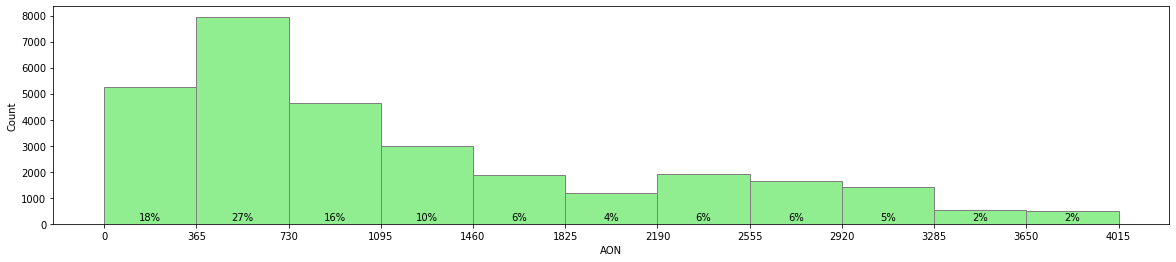

In [54]:
# Customers distribution of the age on network
print(hv_users.aon.describe())
plot_hist(hv_users,'aon',365)

- **Minimun Age** on network is 180 days.
- **Average age** on network for customers is 1209 days (3.2 years).
- 27% of the **HV users are in their 2nd year** with the network.
- Almost 71% users have Age on network **less than 4 years.**
- 15% users are with the network from **over 7 years.**

In [55]:
#Create Derived categorical variable
hv_users['aon_bin'] = pd.cut(churn['aon'], range(0,churn['aon'].max(),365), labels=range(0,int(round(churn['aon'].max()/365))-1))

###### Incoming VS month VS AON

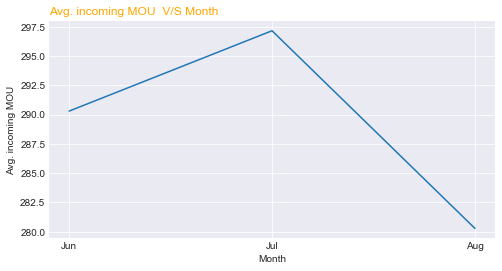

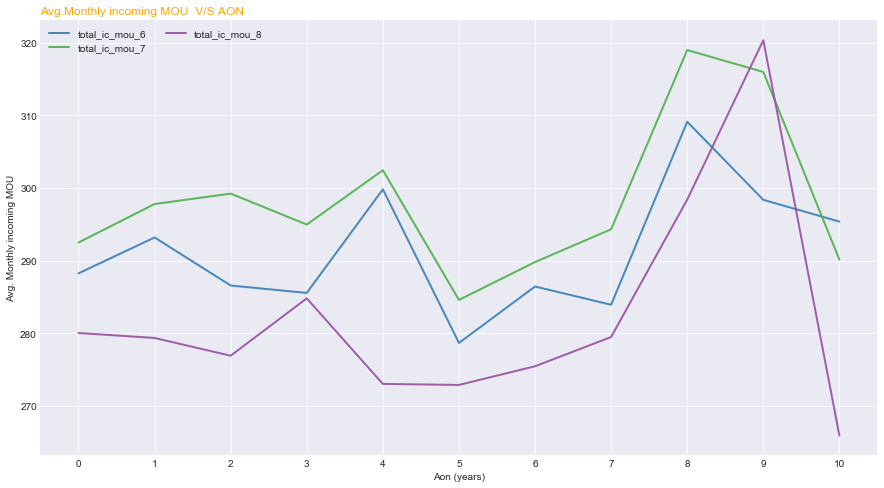

In [56]:
# Plotting Avg. total monthly incoming MOU vs AON
ic_col = hv_users.filter(regex ='total_ic_mou').columns
plot_avgMonthlyCalls('single',hv_users,calltype='incoming',colList=ic_col)
plot_avgMonthlyCalls('multi',hv_users,calltype='incoming',colList=ic_col)

It is evident from the plot that,
- The more a customer stays on with the operator(AON), more are the total monthly incoming MOU.
- Total Incoming MOU avg. for Jul(_7) are more than the previous Jun(_6) for customers in all AON bands.
- Total Incoming MOU avg. for Aug(_8) cease to increace, infact it shows a decline compared to Jul(_7).
- Total Incoming MOU avg. for Sep(_9) is well below the first months(jun _6) avg.
- Althought the Total incoming mou avg inceases from jun to july, it drop little from aug and reduces lower than that for jun.

###### Outgoing VS month VS AON

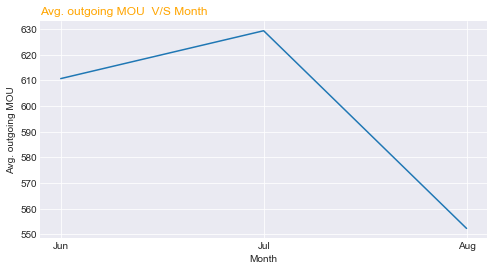

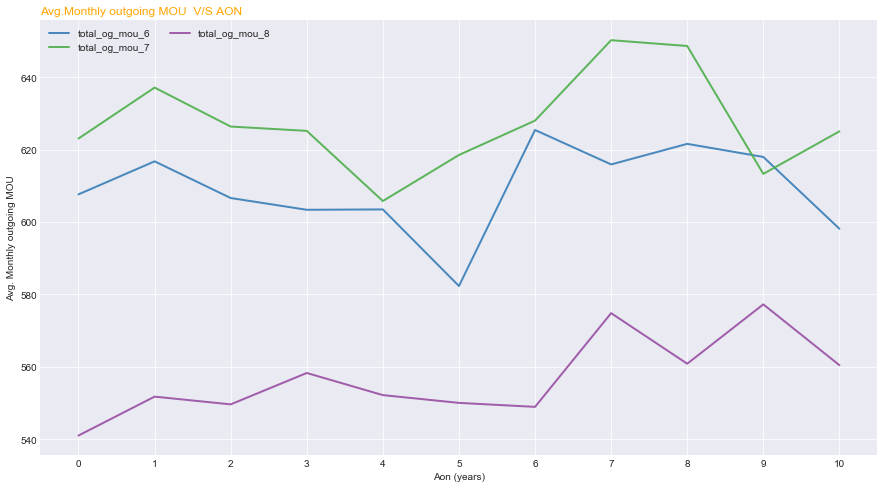

In [57]:
# Plotting Avg. total monthly outgoing MOU vs AON
og_col = hv_users.filter(regex ='total_og_mou').columns
plot_avgMonthlyCalls('single',hv_users,calltype='outgoing',colList=og_col)
plot_avgMonthlyCalls('multi',hv_users,calltype='outgoing',colList=og_col)

What is the above plot saying ?
- Overall, the Avg. total outgoing usage reduces with the increasing age on network.
- Total Outgoing MOU avg. for Jul(_7) are more than the previous Jun(_6) for customers in all AON bands, except in the AON band between 7 - 8 years where it is almost simillar.
- Total outgoing MOU avg. for Aug(_8) cease to increace, infact it shows a significant decline compared to Jul(_7).
- Total outgoing MOU avg. for Sep(_9) is the lowest of all 4 months.
- The Avg. outgoing usage reduces drastically for customers in the AON band between 7 - 8  years.

###### Incoming/Outgoing MOU VS Churn 

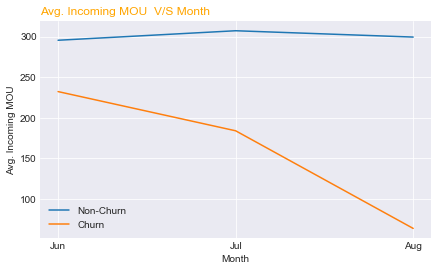

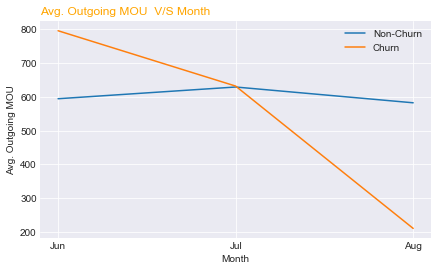

In [58]:
ic_col = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
og_col = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plot_byChurnMou(ic_col,'Incoming')
plot_byChurnMou(og_col,'Outgoing')

It can be observed,
- Churners Avg. Incoming/Outgoing MOU's **drops drastically after the 2nd month,Jul.**
- While the non-churners Avg. MOU's remains consistant and stable with each month.
- Therefore, users MOU is a key feature to predict churn.

Let's also see this trend in terms of actual numbers.

In [59]:
# Avg.Incoming MOU per month churn vs Non-Churn
hv_users.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,295.401726,307.108317,299.319664
1,232.221162,183.978888,63.813168


In [60]:
# Avg. Outgoing MOU per month churn vs Non-Churn
hv_users.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,594.414582,629.096568,582.380539
1,795.591038,631.859433,210.659326


**Create new feature:** og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
These features will hold the **ratio** (=total_og_mou_* / total_ic_mou_*) for each month. These features will combine both incoming and outgoing informations and should be a **better predictor of churn.**

In [61]:
#Creating new feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
# adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,9):
    hv_users['og_to_ic_mou_'+str(i)] = (hv_users['total_og_mou_'+str(i)])/(hv_users['total_ic_mou_'+str(i)]+1)

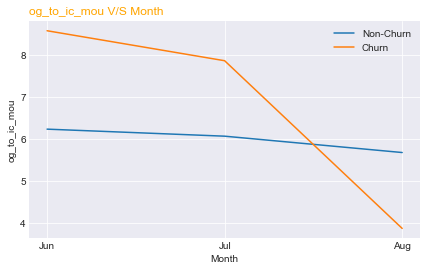

,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8
churn,,,
0,6.235602,6.067952,5.678424
1,8.580257,7.865938,3.870145


In [62]:
plot_byChurn(hv_users,'og_to_ic_mou')

- Outgoing to incoming mou remains drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

**Create new feature:** loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8
These features will hold the **ratio** (=loc_og_mou_* / loc_ic_mou_*) for each month. These features will combine the local calls, both incoming and outgoing informations and should be a **better predictor of churn.**

In [63]:
#Create new feature: loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8
# adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,9):
    hv_users['loc_og_to_ic_mou_'+str(i)] = (hv_users['loc_og_mou_'+str(i)])/(hv_users['loc_ic_mou_'+str(i)]+1)

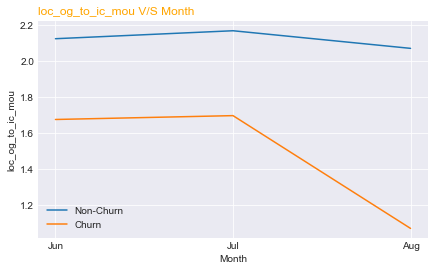

,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8
churn,,,
0,2.124471,2.168763,2.070806
1,1.675413,1.696809,1.069765


In [64]:
plot_byChurn(hv_users,'loc_og_to_ic_mou')

It can be observed that,
- The local outgoing to incoming call mou ratio is genrally low for churners right from the begining of the good phase.
- local mou pattern for the non-churners remains almost constant through out the 3 months.
- The churners genrally show a low loc mou ratio but it drops dramatically after the 2nd month.
- This might suggest that people who are not making/reciving much local calls during their tenure are more likely to churn.

###### Total data volume VS Churn 

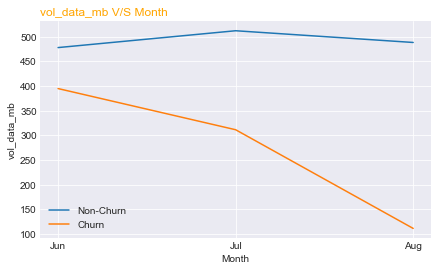

,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8
churn,,,
0,478.037762,512.164072,488.389661
1,394.949545,311.507444,111.469396


In [65]:
plot_byChurn(hv_users,'vol_data_mb')

- The volume of data mb used drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

###### Total monthly rech VS Churn 

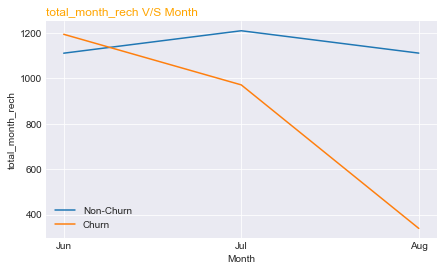

,total_month_rech_6,total_month_rech_7,total_month_rech_8
churn,,,
0,1111.439977,1210.362853,1111.756912
1,1194.747593,971.802758,339.278974


In [66]:
plot_byChurn(hv_users,'total_month_rech')

- total monthly rech amount also drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

###### max_rech_amt VS Churn 

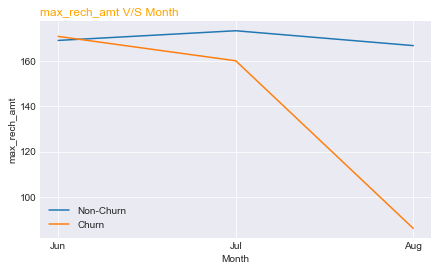

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
churn,,,
0,169.160943,173.437282,166.865250
1,170.930108,160.152192,86.026468


In [67]:
plot_byChurn(hv_users,'max_rech_amt')

- maximum recharge amount also drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

###### arpu VS Churn 

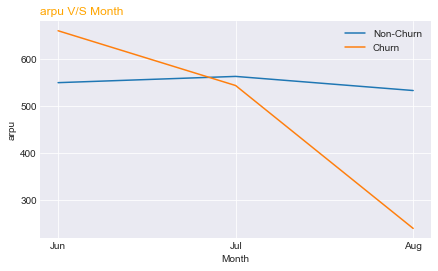

,arpu_6,arpu_7,arpu_8
churn,,,
0,549.843524,563.190828,533.052496
1,660.695411,543.722952,238.631887


In [68]:
plot_byChurn(hv_users,'arpu')

- Average revenue per user,arpu also drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

**Create new feature:** Total_loc_mou_6, Total_loc_mou_7, Total_loc_mou_8<br>
These features will hold the **Total MOU** (=loc_og_mou+loc_ic_mou) for each month.<br>
Using this we will find if the loc MOU (both incoming and outgoing) drops or increaces as the months goes by.<br>
This informations should be a **better predictor of churn.**

In [69]:
#Create new feature: Total_loc_mou_6,Total_loc_mou_7,lTotal_loc_mou_8
for i in range(6,9):
    hv_users['Total_loc_mou_'+str(i)] = (hv_users['loc_og_mou_'+str(i)])+(hv_users['loc_ic_mou_'+str(i)])

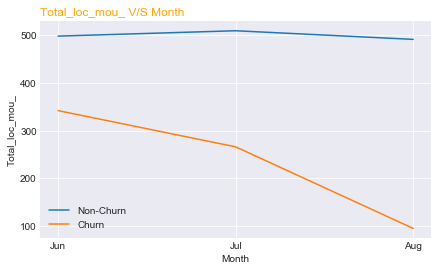

,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8
churn,,,
0,498.548969,509.835211,491.705600
1,342.113462,266.025666,94.701154


In [70]:
plot_byChurn(hv_users,'Total_loc_mou_')

It can be observed that,
- The Total local call mou is genrally low for churners right from the begining of the good phase.
- local mou pattern for the non-churners remains almost constant through out the 3 months.
- The churners genrally show a low total loc mou but it drops dramatically after the 2nd month.
- This might suggest that people who are not making/reciving much local calls during their tenure are more likely to churn.

**Create new feature:** Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8<br>
These features will hold the **Total roaming MOU** (=roam_ic_mou+roam_og_mou) for each month.<br>
Using this we will find if the roam MOU (both incoming and outgoing) drops or increaces as the months goes by.<br>
This informations should be a **better predictor of churn.**

In [71]:
#Create new feature: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
for i in range(6,9):
    hv_users['Total_roam_mou_'+str(i)] = (hv_users['roam_ic_mou_'+str(i)])+(hv_users['roam_og_mou_'+str(i)])

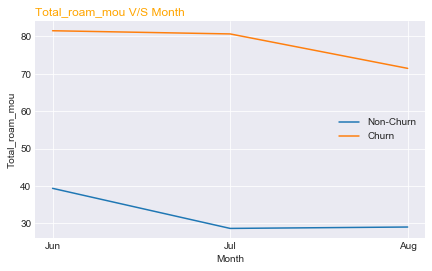

,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
churn,,,
0,39.360033,28.643301,29.016734
1,81.504156,80.651973,71.443623


In [72]:
plot_byChurn(hv_users,'Total_roam_mou')

It can be observed that,
- Surprisingly, the roaming usage of churners is way higher than those of non-churners across all months
- People who are making/reciving more roaming calls during their tenure are more likely to churn.
- This might suggest that the operators roaming tariffs are higher than what are offered by its competitor, thus forming one of the reasons of churn.

###### last_day_rch_amt VS Churn 

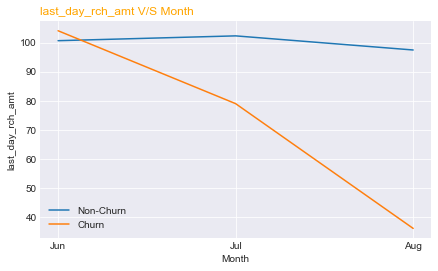

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
churn,,,
0,100.657232,102.318284,97.451724
1,104.085194,78.956989,35.955749


In [73]:
plot_byChurn(hv_users,'last_day_rch_amt')

- The avg. last recharge amount for churners is less than half the amount of that of the non-churners.
- Suggesting, as the recharge amount reduces for a customer its chances to churn increases.

## Modeling

In [74]:
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [75]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [76]:
def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))
    
    

In [77]:
def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [78]:
def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [79]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        

In [80]:
# creating copy of the final hv_user dataframe
hv_users_PCA = hv_users.copy()
# removing the columns not required for modeling
hv_users_PCA.drop(['mobile_number', 'aon_bin'], axis=1, inplace=True)

In [81]:
# removing the datatime columns before PCA
dateTimeCols = list(hv_users_PCA.select_dtypes(include=['datetime64']).columns)
print(dateTimeCols)
hv_users_PCA.drop(dateTimeCols, axis=1, inplace=True)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [82]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = hv_users_PCA.drop(['churn'], axis=1)

#putting response variables in Y
y = hv_users_PCA['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [83]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [84]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

### Handling class imbalance.

Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

**Informed Over Sampling: Synthetic Minority Over-sampling Technique**

This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

**Advantages**
- Mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances
- No loss of useful information

**Command to install the library:**

conda install -c conda-forge imbalanced-learn

In [85]:
print("Before ClassBalancing, counts of label '1': {}".format(sum(y_train==1)))
print("Before ClassBalancing, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before ClassBalancing, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before ClassBalancing, counts of label '1': 1700
Before ClassBalancing, counts of label '0': 19234 

Before ClassBalancing, churn event rate : 8.12% 



In [86]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, sampling_strategy = 1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [87]:
print('After ClassBalancing, the shape of train_X: {}'.format(X_train_res.shape))
print('After ClassBalancing, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After ClassBalancing, counts of label '1': {}".format(sum(y_train_res==1)))
print("After ClassBalancing, counts of label '0': {}".format(sum(y_train_res==0)))
print("After ClassBalancing, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After ClassBalancing, the shape of train_X: (38468, 178)
After ClassBalancing, the shape of train_y: (38468,) 

After ClassBalancing, counts of label '1': 19234
After ClassBalancing, counts of label '0': 19234
After ClassBalancing, churn event rate : 50.0% 



In [94]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [95]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

we'll let PCA select the number of components basen on a variance cutoff we provide

In [100]:
# let PCA select the number of components basen on a variance cutoff 
pca_again = PCA(0.9)

In [101]:
df_train_pca2 = pca_again.fit_transform(X_train_res)
df_train_pca2.shape
# we see that PCA selected 12 components

(38468, 12)

In [102]:
#Applying selected components to the test data - 50 components
X_test_pca = pca_again.transform(X_test)
X_test_pca.shape

(8972, 12)

 **Looking at the screeplot to assess the number of needed principal components**

In [103]:
pca.explained_variance_ratio_[:50]

array([0.52913894, 0.1166657 , 0.0816683 , 0.04689798, 0.02584179,
       0.02237079, 0.01964869, 0.01659088, 0.01321824, 0.01176983,
       0.00898743, 0.00843637, 0.0076714 , 0.0061281 , 0.0054974 ,
       0.00498053, 0.0039488 , 0.00364592, 0.00345993, 0.00334175,
       0.00313343, 0.00308146, 0.00300552, 0.00267775, 0.00263377,
       0.00239202, 0.00232195, 0.00216938, 0.00211813, 0.00207988,
       0.00192842, 0.00182302, 0.00161634, 0.00134886, 0.00132756,
       0.00129843, 0.00119413, 0.00118133, 0.00103869, 0.00092527,
       0.00087023, 0.00080434, 0.00080033, 0.00074551, 0.00073027,
       0.00071356, 0.00065167, 0.00064958, 0.00062886, 0.00060785])

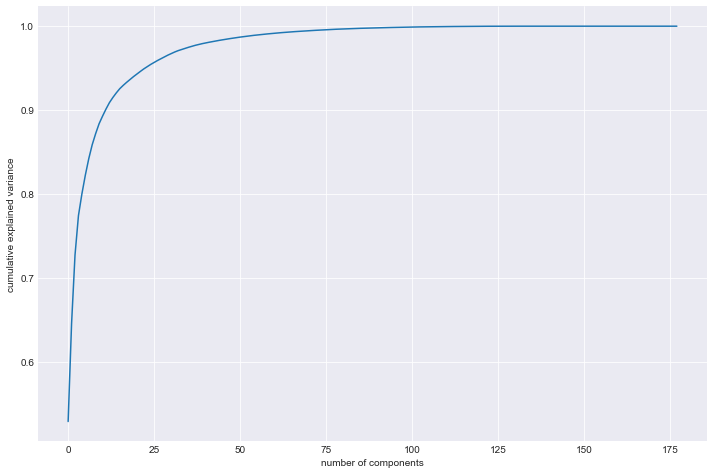

In [104]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

##### **Looks like 50 components are enough to describe 95% of the variance in the dataset**
- We'll choose 50 components for our modeling

In [105]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=35)

In [106]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(38468, 35)

In [107]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.009724118403003228 , min corr:  -0.013984397042992867


Indeed - there is no correlation between any two components! We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [108]:
#Applying selected components to the test data - 50 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8972, 35)

For the prediction of churn customers we will be fitting variety of models and select one which is the best predictor of churn. Models trained are,
    1. Logistic Regression
    2. Decision Tree
    3. Random Forest
    4. Boosting models - Gradient Boosting Classifier and XGBoost Classifier
    5. SVM

### 1. Logistic Regression

##### Applying Logistic Regression on our principal components

In [109]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(class_weight='balanced')

In [110]:
modelfit(lr0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.827
Recall/Sensitivity : 0.8417
AUC Score (Train): 0.899922
CV Score : Mean - 0.899092 | Std - 0.002047475 | Min - 0.8965539 | Max - 0.9027485


In [111]:
# predictions on Test data
pred_probs_test = lr0.predict(X_test_pca)
getModelMetrics(y_test,pred_probs_test)

Roc_auc_score : 0.8176059484622296
Sensitivity/Recall : 0.8203342618384402
Specificity: 0.8148776350860188
False Positive Rate: 0.1851223649139811
Positive predictive value: 0.27822390174775624
Negative Predictive value: 0.9811816192560175
sklearn precision score value: 0.27822390174775624


In [112]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.81531431119037
Recall : 0.8203342618384402
Precision : 0.27822390174775624


In [113]:
#Making prediction on the test data
pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.9


In [114]:
cut_off_prob=0.5
y_train_df = predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8269730685244878
Sensitivity/Recall : 0.8416865966517625
Specificity: 0.8122595403972133
False Positive Rate: 0.18774045960278674
Positive predictive value: 0.8176262626262626
Negative Predictive value: 0.8368866509535033
sklearn precision score value: 0.8176262626262626


,churn,churn_Prob,final_predicted
0,0,0.721737,1
1,0,0.008851,0
2,0,0.124666,0
3,0,0.022137,0
4,0,0.839900,1


**Plotting the ROC Curve :**
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

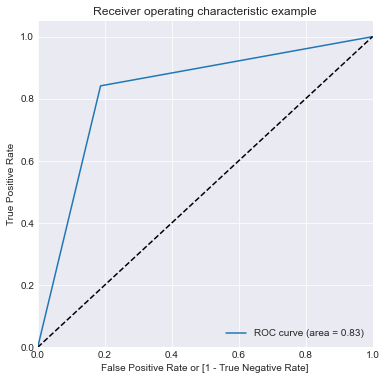

(array([0.        , 0.18774046, 1.        ]),
 array([0.       , 0.8416866, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [115]:
draw_roc(y_train_df.churn, y_train_df.final_predicted)

The roc curve is lying in the top left corner which is a sign of a good fit.

In [116]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.83


**Finding Optimal Cutoff Point**<br>
Since recall or sensitivity is a much more important metrics for churn prediction. A trade off between sensitivity(or recall) and specificity is to be considered in doing so. We will try adjusting the probability threshold which shall lead to higher sensitivity or recall rate.

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.672585  0.980087  0.365083
0.2   0.2  0.742383  0.954404  0.530363
0.3   0.3  0.784808  0.920921  0.648695
0.4   0.4  0.813273  0.886191  0.740356
0.5   0.5  0.826973  0.841687  0.812260
0.6   0.6  0.828403  0.782573  0.874233
0.7   0.7  0.814313  0.712956  0.915670
0.8   0.8  0.773474  0.596340  0.950608
0.9   0.9  0.596756  0.208381  0.985130


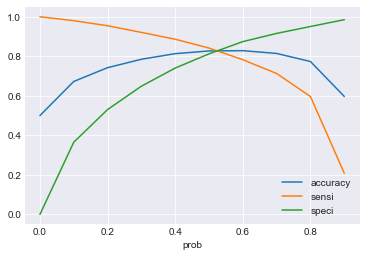

In [117]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

#### **From the curve above, 0.45 is the optimum point .**
Although, other cutoff between 0.4 and 0.6 can also be taken but to keep the test sensitivity/recall significant we choose 0.45. At this point there is a balance of sensitivity, specificity and accuracy.

In [118]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.45
predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.8212020380576063
Sensitivity/Recall : 0.8647707185192888
Specificity: 0.7776333575959239
False Positive Rate: 0.2223666424040761
Positive predictive value: 0.795456719273075
Negative Predictive value: 0.8518623989064814
sklearn precision score value: 0.795456719273075


,churn,churn_Prob,final_predicted
0,0,0.721737,1
1,0,0.008851,0
2,0,0.124666,0
3,0,0.022137,0
4,0,0.839900,1
...,...,...,...
38463,1,0.835216,1
38464,1,0.880460,1
38465,1,0.737598,1
38466,1,0.875088,1


**Making prediction on test**

In [119]:
# predicting with the choosen cut-off on test
predictChurnWithProb(lr0,X_test_pca,y_test,cut_off_prob)

Roc_auc_score : 0.812180031898099
Sensitivity/Recall : 0.8440111420612814
Specificity: 0.7803489217349164
False Positive Rate: 0.2196510782650836
Positive predictive value: 0.25051674245556016
Negative Predictive value: 0.9829085914848161
sklearn precision score value: 0.25051674245556016


,churn,churn_Prob,final_predicted
4265,0,0.441472,0
29221,0,0.580771,1
974,0,0.392250,0
1602,0,0.307631,0
10225,0,0.158507,0
...,...,...,...
6262,0,0.204060,0
1424,0,0.042641,0
18308,0,0.265123,0
22978,0,0.106381,0


The resulting model, after PCA and logistic regression (with optimal cutoff setting) has a right balance of different metrics score for sensitivity, specificity and Roc Accuracy on the train and test set.
- **train sensitivity  :** 86.47%, **train roc auc score  :** 82.1%
- **test sensitivity   :** 84.40%, **test roc auc score  :** 81.21%

### 2. Decision Tree

##### Applying Decision Tree Classifier on our principal components with Hyperparameter tuning

In [120]:
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
modelfit(dt0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.7737
Recall/Sensitivity : 0.7352
AUC Score (Train): 0.852021
CV Score : Mean - 0.8401286 | Std - 0.005626982 | Min - 0.8340481 | Max - 0.8481667


In [121]:
# make predictions
pred_probs_test = dt0.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.728165562337295
Sensitivity/Recall : 0.6476323119777159
Specificity: 0.8086988126968743
False Positive Rate: 0.19130118730312576
Positive predictive value: 0.22749510763209393
Negative Predictive value: 0.9634815242494227
sklearn precision score value: 0.22749510763209393


In [122]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [123]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   18.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   45.6s
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:  1.2min finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             scoring='f1_weighted', verbose=1)

In [124]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8098280310149203 using {'max_depth': 11, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [125]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=14,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

In [126]:
modelfit(dt_final,X_train_pca,y_train_res)


Model Report
Accuracy : 0.8314
Recall/Sensitivity : 0.8248
AUC Score (Train): 0.916653
CV Score : Mean - 0.8930817 | Std - 0.003272421 | Min - 0.8867514 | Max - 0.8961325


In [127]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7529363664650144
Sensitivity/Recall : 0.6754874651810585
Specificity: 0.8303852677489701
False Positive Rate: 0.1696147322510298
Positive predictive value: 0.2572944297082228
Negative Predictive value: 0.9671229010864965
sklearn precision score value: 0.2572944297082228


In [128]:
# classification report
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      8254
           1       0.26      0.68      0.37       718

    accuracy                           0.82      8972
   macro avg       0.61      0.75      0.63      8972
weighted avg       0.91      0.82      0.85      8972



Even after hyperparameter tuning for the Decision Tree. The recall rate is 67.54% which is not very significant to predict the churn.

Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [129]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8313663304564833
Sensitivity/Recall : 0.8248414266403244
Specificity: 0.8378912342726422
False Positive Rate: 0.1621087657273578
Positive predictive value: 0.8357477743243955
Negative Predictive value: 0.8270977675134719
sklearn precision score value: 0.8357477743243955


,churn,churn_Prob,final_predicted
0,0,0.029630,0
1,0,0.000000,0
2,0,0.136054,0
3,0,0.060000,0
4,0,0.753769,1


     prob  accuracy     sensi     speci
0.0   0.0  0.608116  1.000000  0.216232
0.1   0.1  0.732375  0.988302  0.476448
0.2   0.2  0.776542  0.967194  0.585890
0.3   0.3  0.807944  0.935427  0.680462
0.4   0.4  0.824088  0.897889  0.750286
0.5   0.5  0.831366  0.824841  0.837891
0.6   0.6  0.827337  0.784652  0.870022
0.7   0.7  0.813507  0.720755  0.906260
0.8   0.8  0.764454  0.575803  0.953104
0.9   0.9  0.694837  0.406000  0.983675


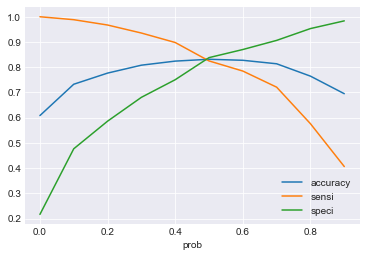

In [130]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

**From the curve above, let'choose 0.5 as the optimum point to make a high enough sensitivity.**

In [131]:
# predicting churn with cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8313663304564833
Sensitivity/Recall : 0.8248414266403244
Specificity: 0.8378912342726422
False Positive Rate: 0.1621087657273578
Positive predictive value: 0.8357477743243955
Negative Predictive value: 0.8270977675134719
sklearn precision score value: 0.8357477743243955


,churn,churn_Prob,final_predicted
0,0,0.029630,0
1,0,0.000000,0
2,0,0.136054,0
3,0,0.060000,0
4,0,0.753769,1


- At 0.5 cut-off prob. there is a balance of sensitivity , specificity and accuracy.
<br>Lets see how it performs on test data.

In [132]:
#Lets see how it performs on test data.
y_test_df= predictChurnWithProb(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7529363664650144
Sensitivity/Recall : 0.6754874651810585
Specificity: 0.8303852677489701
False Positive Rate: 0.1696147322510298
Positive predictive value: 0.2572944297082228
Negative Predictive value: 0.9671229010864965
sklearn precision score value: 0.2572944297082228


,churn,churn_Prob,final_predicted
4265,0,0.278846,0
29221,0,0.650000,1
974,0,0.621622,1
1602,0,0.194286,0
10225,0,0.000000,0


- Decision tree after selecting optimal cut-off also is resulting in a model with
<br>**Train Recall : 82.48%**  and  **Train Roc_auc_score : 83.14**
<br>**Test Recall : 67.55%**  and  **Test Roc_auc_score : 75.29**

Random Forest still seems overfitted to the data. 

### 3. Random Forest

##### Applying Random Forest Classifier on our principal components with Hyperparameter tuning

In [133]:
def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

#### Tuning max_depth

In [136]:
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters, 
                    cv=5, 
                    return_train_score=True,
                   scoring="f1")
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='f1')

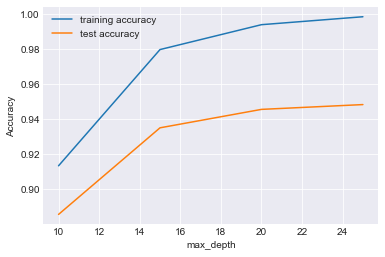

In [137]:
scores = rfgs.cv_results_
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Test f1-score almost becomes constant after max_depth=20

#### Tuning n_estimators

In [141]:
parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(max_depth=20,random_state=10)
rfgs = GridSearchCV(rf1, parameters, 
                    cv=3, 
                    return_train_score=True,
                   scoring="recall")

In [142]:
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, random_state=10),
             param_grid={'n_estimators': range(50, 150, 25)},
             return_train_score=True, scoring='recall')

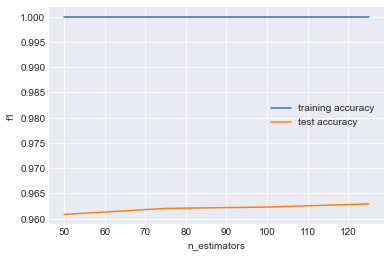

In [143]:
plot_traintestAcc(rfgs.cv_results_,'n_estimators')

Selecting n_estimators = 80

#### Tuning max_features

In [147]:
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf3 = RandomForestClassifier(max_depth=20,n_estimators=80,random_state=10)
rfgs = GridSearchCV(rf3, parameters, 
                    cv=5, 
                    return_train_score=True,
                   scoring="f1")

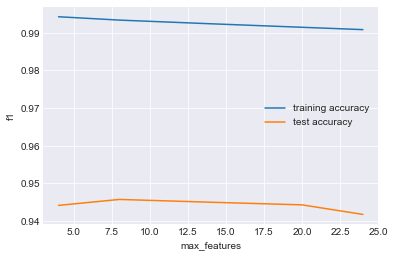

In [148]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'max_features')

Selecting max_features = 5

#### Tuning min_sample_leaf

In [149]:
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf4 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,random_state=10)
rfgs = GridSearchCV(rf4, parameters, 
                    cv=3, 
                    return_train_score=True,
                   scoring="f1")

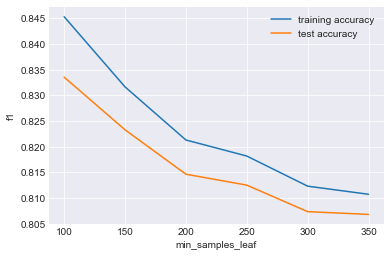

In [150]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'min_samples_leaf')

Selecting min_sample_leaf = 100

#### Tuning min_sample_split

In [151]:
parameters = {'min_samples_split': range(50, 300, 50)}
rf5 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100,random_state=10)
rfgs = GridSearchCV(rf5, parameters, 
                    cv=3, 
                    return_train_score=True,
                   scoring="f1")

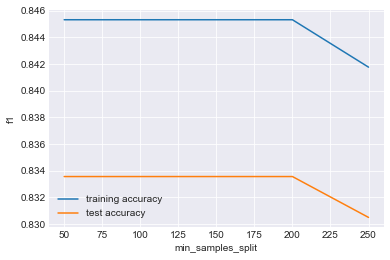

In [152]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'min_samples_split')

Selecting min_sample_split = 150

#### Tunned Random Forest

In [153]:
rf_final = RandomForestClassifier(max_depth=20,
                                  n_estimators=80,
                                  max_features=5,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=10)

In [154]:
print("Model performance on Train data:")
modelfit(rf_final,X_train_pca,y_train_res)

Model performance on Train data:

Model Report
Accuracy : 0.8563
Recall/Sensitivity : 0.8529
AUC Score (Train): 0.935241
CV Score : Mean - 0.9179006 | Std - 0.003089992 | Min - 0.9123647 | Max - 0.9209084


In [155]:
# predict on test data
predictions = rf_final.predict(X_test_pca)

In [156]:
print("Model performance on Test data:")
getModelMetrics(y_test,predictions)

Model performance on Test data:
Roc_auc_score : 0.7930275048545721
Sensitivity/Recall : 0.733983286908078
Specificity: 0.8520717228010661
False Positive Rate: 0.14792827719893384
Positive predictive value: 0.301487414187643
Negative Predictive value: 0.9735603543743079
sklearn precision score value: 0.301487414187643


After hyperparameter tuning for the random forest. The Recall rate(Test) is 73.39%.

Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [157]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(rf_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8562701466153686
Sensitivity/Recall : 0.8529167099927212
Specificity: 0.859623583238016
False Positive Rate: 0.14037641676198398
Positive predictive value: 0.8586757393352525
Negative Predictive value: 0.8538966069307442
sklearn precision score value: 0.8586757393352525


,churn,churn_Prob,final_predicted
0,0,0.444901,0
1,0,0.049022,0
2,0,0.256567,0
3,0,0.322113,0
4,0,0.810293,1


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.576479  1.000000  0.152958
0.2   0.2  0.721223  0.993657  0.448789
0.3   0.3  0.807450  0.965218  0.649683
0.4   0.4  0.848887  0.916866  0.780909
0.5   0.5  0.856270  0.852917  0.859624
0.6   0.6  0.842934  0.767859  0.918010
0.7   0.7  0.800198  0.642456  0.957939
0.8   0.8  0.713866  0.444057  0.983675
0.9   0.9  0.582510  0.166944  0.998076


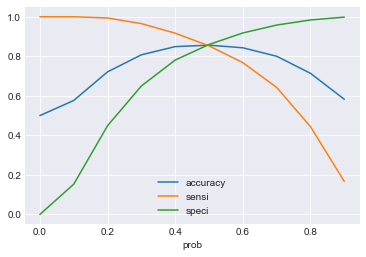

In [158]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

**From the curve above, 0.45 is the optimal point with high enough sensitivity.**

In [159]:
cut_off_prob=0.45
predictChurnWithProb(rf_final,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.856062181553499
Sensitivity/Recall : 0.887074971404804
Specificity: 0.825049391702194
False Positive Rate: 0.17495060829780598
Positive predictive value: 0.8352670485142214
Negative Predictive value: 0.8796075605565101
sklearn precision score value: 0.8352670485142214


,churn,churn_Prob,final_predicted
0,0,0.444901,0
1,0,0.049022,0
2,0,0.256567,0
3,0,0.322113,0
4,0,0.810293,1
...,...,...,...
38463,1,0.672480,1
38464,1,0.924164,1
38465,1,0.831023,1
38466,1,0.867714,1


**Making prediction on test**

In [160]:
y_test_df= predictChurnWithProb(rf_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7965333597013485
Sensitivity/Recall : 0.775766016713092
Specificity: 0.8173007026896051
False Positive Rate: 0.18269929731039497
Positive predictive value: 0.26973365617433415
Negative Predictive value: 0.9766903141740263
sklearn precision score value: 0.26973365617433415


,churn,churn_Prob,final_predicted
4265,0,0.454218,1
29221,0,0.379705,0
974,0,0.606964,1
1602,0,0.382579,0
10225,0,0.223496,0


- Random Forest after selecting optimal cut-off also is resulting in a model with
<br>**Train Recall : 88.70%**  and  **Train Roc_auc_score : 85.60**
<br>**Test Recall : 77.57%**  and  **Test Roc_auc_score : 79.65**

### 4. Boosting models

###### 4.1 Gradiant boosting Classifier

###### Applying Gradiant boosting Classifier on our principal components with Hyperparameter tuning

In [161]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
# Fitting the default GradientBoostingClassifier
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8558
Recall/Sensitivity : 0.8601
AUC Score (Train): 0.926351
CV Score : Mean - 0.9185544 | Std - 0.003396104 | Min - 0.9128902 | Max - 0.9216971


In [162]:
# Hyperparameter tuning for n_estimators
param_test1 = {'n_estimators':range(20,150,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=4,
             param_grid={'n_estimators': range(20, 150, 10)}, scoring='f1')

In [163]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 140}, 0.9035607423830516)

In [164]:
# Hyperparameter tuning for max_depth and min_sample_split
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch2.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  n_estimators=140,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(5, 16, 2),
                         'min_samples_split': range(200, 1001, 200)},
             scoring='f1')

In [165]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 15, 'min_samples_split': 200}, 0.9450180707530308)

In [166]:
# Hyperparameter tuning for min_sample_leaf
param_test3 = {'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=15,min_samples_split=200, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch3.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=15,
                                                  max_features='sqrt',
                                                  min_samples_split=200,
                                                  n_estimators=140,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=4,
             param_grid={'min_samples_leaf': range(30, 71, 10)}, scoring='f1')

In [167]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 30}, 0.9447422603542139)

In [168]:
# Hyperparameter tuning for max_features
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=15, min_samples_split=200, min_samples_leaf=30, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch4.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=15,
                                                  min_samples_leaf=30,
                                                  min_samples_split=200,
                                                  n_estimators=140,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=4, param_grid={'max_features': range(7, 20, 2)},
             scoring='f1')

In [169]:
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 13}, 0.9479643687156383)

Tunned GradientBoostingClassifier

In [170]:
# Tunned GradientBoostingClassifier
gbm_final = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_features=15,max_depth=15, min_samples_split=200, min_samples_leaf=40, subsample=0.8, random_state=10)
modelfit(gbm_final, X_train_pca, y_train_res)


Model Report
Accuracy : 0.9998
Recall/Sensitivity : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.9873941 | Std - 0.0011121 | Min - 0.9855042 | Max - 0.9884794


In [171]:
# predictions on Test data
dtest_predictions = gbm_final.predict(X_test_pca)

In [172]:
# model Performance on test data
getModelMetrics(y_test,dtest_predictions)

Roc_auc_score : 0.759738166959482
Sensitivity/Recall : 0.5807799442896936
Specificity: 0.9386963896292707
False Positive Rate: 0.061303610370729344
Positive predictive value: 0.4517876489707476
Negative Predictive value: 0.9626040501925706
sklearn precision score value: 0.4517876489707476


Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [173]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(gbm_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9997660393053968
Sensitivity/Recall : 1.0
Specificity: 0.9995320786107934
False Positive Rate: 0.0004679213892066133
Positive predictive value: 0.9995322974588162
Negative Predictive value: 1.0
sklearn precision score value: 0.9995322974588162


,churn,churn_Prob,final_predicted
0,0,0.020715,0
1,0,0.002513,0
2,0,0.014761,0
3,0,0.015672,0
4,0,0.251142,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.965166  1.000000  0.930332
0.2   0.2  0.990122  1.000000  0.980243
0.3   0.3  0.996985  1.000000  0.993969
0.4   0.4  0.998986  1.000000  0.997972
0.5   0.5  0.999766  1.000000  0.999532
0.6   0.6  0.999896  0.999948  0.999844
0.7   0.7  0.999792  0.999584  1.000000
0.8   0.8  0.998726  0.997452  1.000000
0.9   0.9  0.984663  0.969325  1.000000


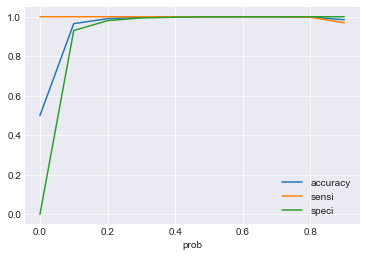

In [174]:
findOptimalCutoff(y_train_df)

In [175]:
cut_off_prob=0.1
predictChurnWithProb(gbm_final,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.965165852136841
Sensitivity/Recall : 1.0
Specificity: 0.9303317042736821
False Positive Rate: 0.06966829572631798
Positive predictive value: 0.9348692524545543
Negative Predictive value: 1.0
sklearn precision score value: 0.9348692524545543


,churn,churn_Prob,final_predicted
0,0,0.020715,0
1,0,0.002513,0
2,0,0.014761,0
3,0,0.015672,0
4,0,0.251142,1
...,...,...,...
38463,1,0.993733,1
38464,1,0.972359,1
38465,1,0.981547,1
38466,1,0.991861,1


**Making prediction on test**

In [176]:
y_test_df= predictChurnWithProb(gbm_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8087663076161942
Sensitivity/Recall : 0.7952646239554317
Specificity: 0.8222679912769566
False Positive Rate: 0.17773200872304337
Positive predictive value: 0.2801766437684004
Negative Predictive value: 0.9788001153735217
sklearn precision score value: 0.2801766437684004


,churn,churn_Prob,final_predicted
4265,0,0.307174,1
29221,0,0.056469,0
974,0,0.447631,1
1602,0,0.023201,0
10225,0,0.016619,0


This model is litrally over-fitting the Training data with a lower performance on the Test data.

###### 4.2 XGBoost Classifier

##### Applying XGBoost Classifier on our principal components with Hyperparameter tuning

Command to install library:<br>pip install xgboost

In [178]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# Fitting the XGBClassifier
xgb1 = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)

In [180]:
# Model fit and performance on Train data
modelfit(xgb1, X_train_pca, y_train_res)


Model Report
Accuracy : 0.9985
Recall/Sensitivity : 0.9995
AUC Score (Train): 0.999991
CV Score : Mean - 0.9852889 | Std - 0.001094251 | Min - 0.9835717 | Max - 0.9868641


In [182]:
# Hyperparameter tunning for the XGBClassifer
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [183]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.9445093573965541)

In [184]:
# Some more hyperparameter tunning for the XGBClassifer
param_test2 = param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch2.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=9, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [185]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.1}, 0.9455526445452233)

In [186]:
# Final XGBClassifier
xgb2 = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

In [187]:
# Fit Train data
modelfit(xgb2, X_train_pca, y_train_res)


Model Report
Accuracy : 0.9962
Recall/Sensitivity : 0.9997
AUC Score (Train): 0.999957
CV Score : Mean - 0.9857276 | Std - 0.000926167 | Min - 0.9840054 | Max - 0.9866005


In [188]:
# Prediction on Test data
dtest_predictions = xgb2.predict(X_test_pca)

In [189]:
# Model evaluation on Test data
getModelMetrics(y_test,dtest_predictions)

Roc_auc_score : 0.764399534825016
Sensitivity/Recall : 0.5974930362116991
Specificity: 0.931306033438333
False Positive Rate: 0.06869396656166707
Positive predictive value: 0.4307228915662651
Negative Predictive value: 0.9637662988966901
sklearn precision score value: 0.4307228915662651


Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [190]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(xgb2,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.996178641988146
Sensitivity/Recall : 0.9996880524071956
Specificity: 0.9926692315690964
False Positive Rate: 0.0073307684309036085
Positive predictive value: 0.9927203262945945
Negative Predictive value: 0.9996858474265669
sklearn precision score value: 0.9927203262945945


,churn,churn_Prob,final_predicted
0,0,0.056335,0
1,0,0.001047,0
2,0,0.074612,0
3,0,0.017840,0
4,0,0.415750,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.938520  1.000000  0.877041
0.2   0.2  0.973432  1.000000  0.946865
0.3   0.3  0.986482  1.000000  0.972965
0.4   0.4  0.992669  0.999948  0.985390
0.5   0.5  0.996179  0.999688  0.992669
0.6   0.6  0.997686  0.998700  0.996673
0.7   0.7  0.996127  0.993917  0.998336
0.8   0.8  0.989472  0.979411  0.999532
0.9   0.9  0.955469  0.910939  1.000000


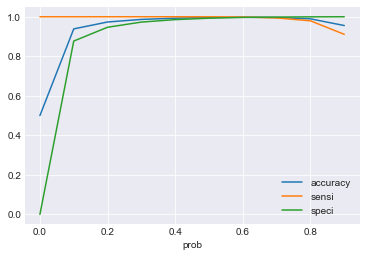

In [191]:
# Finding optimal cut-off probability
findOptimalCutoff(y_train_df)

In [192]:
# Selecting 0.2 as cut-off in an attempt to improve recall rate
cut_off_prob=0.2
predictChurnWithProb(xgb2,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.9734324633461579
Sensitivity/Recall : 1.0
Specificity: 0.9468649266923157
False Positive Rate: 0.05313507330768431
Positive predictive value: 0.9495458135860979
Negative Predictive value: 1.0
sklearn precision score value: 0.9495458135860979


,churn,churn_Prob,final_predicted
0,0,0.056335,0
1,0,0.001047,0
2,0,0.074612,0
3,0,0.017840,0
4,0,0.415750,1
...,...,...,...
38463,1,0.987175,1
38464,1,0.965802,1
38465,1,0.933915,1
38466,1,0.988615,1


**Making prediction on test**

In [193]:
y_test_df= predictChurnWithProb(xgb2,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.806017408289591
Sensitivity/Recall : 0.754874651810585
Specificity: 0.857160164768597
False Positive Rate: 0.14283983523140295
Positive predictive value: 0.31493317838466006
Negative Predictive value: 0.9757274858640188
sklearn precision score value: 0.31493317838466006


,churn,churn_Prob,final_predicted
4265,0,0.559298,1
29221,0,0.058509,0
974,0,0.193681,0
1602,0,0.018037,0
10225,0,0.089590,0


### 5. SVM

##### Using linear kernal

In [194]:
# instantiate an object of class SVC()
# note that we are using cost C=1
svm0 = SVC(C = 1)

In [195]:
# fit
svm0.fit(X_train_pca, y_train_res)

# predict on train
y_pred = svm0.predict(X_train_pca)
getModelMetrics(y_train_res,y_pred)

Roc_auc_score : 0.8572579806592491
Sensitivity/Recall : 0.8457419153582199
Specificity: 0.8687740459602786
False Positive Rate: 0.13122595403972132
Positive predictive value: 0.8656803789047949
Negative Predictive value: 0.8492148193322153
sklearn precision score value: 0.8656803789047949


In [196]:
# Predict on test
y_pred = svm0.predict(X_test_pca)
getModelMetrics(y_test,y_pred)

Roc_auc_score : 0.8093201034292143
Sensitivity/Recall : 0.7479108635097493
Specificity: 0.8707293433486795
False Positive Rate: 0.12927065665132056
Positive predictive value: 0.334788029925187
Negative Predictive value: 0.9754343105320304
sklearn precision score value: 0.334788029925187


###### Hyperparameter tuning for linear kernal

Let's see if we can tune the hyperparameters of SVM and get a better Sensitivity score.

In [197]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

svm1 = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme
model_cv = GridSearchCV(estimator = svm1, param_grid = params, 
                        scoring= 'f1', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs=4,
                       return_train_score=True) 
model_cv.fit(X_train_pca, y_train_res)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 19.4min finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, return_train_score=True,
             scoring='f1', verbose=1)

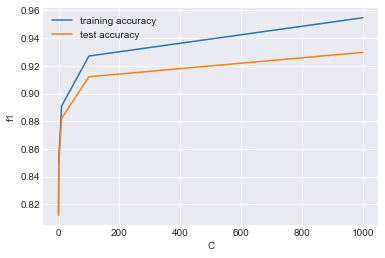

In [198]:
plot_traintestAcc(model_cv.cv_results_,'C')

In [199]:
model_cv.best_params_

{'C': 1000}

In [200]:
svm_final = SVC(C = 1000)
# fit
svm_final.fit(X_train_pca, y_train_res)

SVC(C=1000)

In [201]:
# predict
y_pred = svm_final.predict(X_test_pca)

In [202]:
getModelMetrics(y_test,y_pred)

Roc_auc_score : 0.7431706953259094
Sensitivity/Recall : 0.5793871866295265
Specificity: 0.9069542040222922
False Positive Rate: 0.09304579597770778
Positive predictive value: 0.35135135135135137
Negative Predictive value: 0.9612223934257833
sklearn precision score value: 0.35135135135135137


##### Using non-linear kernal

In [203]:
svm_k = SVC(C = 1000, kernel='rbf')
svm_k.fit(X_train_pca, y_train_res)

SVC(C=1000)

In [204]:
y_pred = svm_k.predict(X_test_pca)

In [205]:
getModelMetrics(y_test,y_pred)

Roc_auc_score : 0.7431706953259094
Sensitivity/Recall : 0.5793871866295265
Specificity: 0.9069542040222922
False Positive Rate: 0.09304579597770778
Positive predictive value: 0.35135135135135137
Negative Predictive value: 0.9612223934257833
sklearn precision score value: 0.35135135135135137


**Recall Score: 78%**

Now that we have a variety of models used to predict the churn for the telecom. Let's caompare and decide a model of choice for this problem of churn prediction.

---------------

## Final Choice of Model 

Recall is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives. 

| Model/Metrics                         | Train   | Test   |
|---------------------------------------|---------|--------|
| Logistic Regression ( cut-off = 0.45) |         |        |
| Roc_auc_score                         | 82.11%  | 81.21% |
| Sensitivity/Recall                    | 86.48%  | 84.40% |
| Specificity                           | 77.75%  | 78.02% |
| precision                             | 79.54%  | 25.04% |
| DecisionTree ( cut-off = 0.4)         |         |        |
| Roc_auc_score                         | 82.41%  | 76.57% |
| Sensitivity/Recall                    | 89.79%  | 78.13% |
| Specificity                           | 75.03%  | 75%    |
| precision                             | 78.24%  | 21.38% |
| Random Forest (cut-off = 0.45)        |         |        |
| Roc_auc_score                         | 85.60%  | 96.53% |
| Sensitivity/Recall                    | 88.70%  | 77.57% |
| Specificity                           | 82.50%  | 81.73% |
| precision                             | 83.52%  | 26.97% |
| GBC                                   |         |        |
| Roc_auc_score                         | 96.11%  | 80.84% |
| Sensitivity/Recall                    | 100.00% | 79.87% |
| Specificity                           | 92.21%  | 81.81% |
| precision                             | 92.78%  | 28.52% |
| XGB (cut-off = 0.2)                   |         |        |
| Roc_auc_score                         | 97.24%  | 80.76% |
| Sensitivity/Recall                    | 99.99%  | 76.13% |
| Specificity                           | 94.49%  | 85.38% |
| precision                             | 94.78%  | 32.13% |
| SVM (linear   C = 1000 )              |         |        |
| Roc_auc_score                         | 81.33%  | 82.62% |
| Sensitivity/Recall                    | 79.91%  | 78.40% |
| Specificity                           | 82.75%  | 86.85% |
| precision                             | 82.25%  | 35.14% |

Overall, the **Logistic Regression** model with probability cut-off = 0.45, performs best. It achieved the **best recall accuracy of 84.4%** for test data. Also the overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting. The precision is compromised in this effort but the business objective to predict Churn customers is most accuratety captured by it. 

Next, Linear SVM which achives a recall rate of 78.40%, a slightly better precision of 35.14% and a balanced overall accuracy on train and test.

From the Tree Family, the Decision Tree overfitted the data slightly while obtaining 78.13% recall accuracy on test data. 
The Random Forest avoided overfitting but obtained only 77.57% recall accuracy on test data. 

Among the Bossting Methods, Gradient Boosting Classifer (GBC) achived 81.81% recall rate and XGBoost Classifier achived 76.13% but both tend to overfit the training data.



## Identifying relevant churn features. 

We will use an instance of Random Forest classifier to identify the features most relevant to churn. 

### Random Forest for churn driver features 

In [206]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [12, 15, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1)

In [207]:
# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 32.1min
[Parallel(n_jobs=4)]: Done 324 out of 324 | elapsed: 57.2min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [8, 10, 12], 'max_features': [12, 15, 20],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [208]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8913124229347954 using {'max_depth': 12, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [209]:
rf = RandomForestClassifier(max_depth=12,
                            max_features=20,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=300,
                            random_state=10)

In [210]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=12, max_features=20, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300,
                       random_state=10)

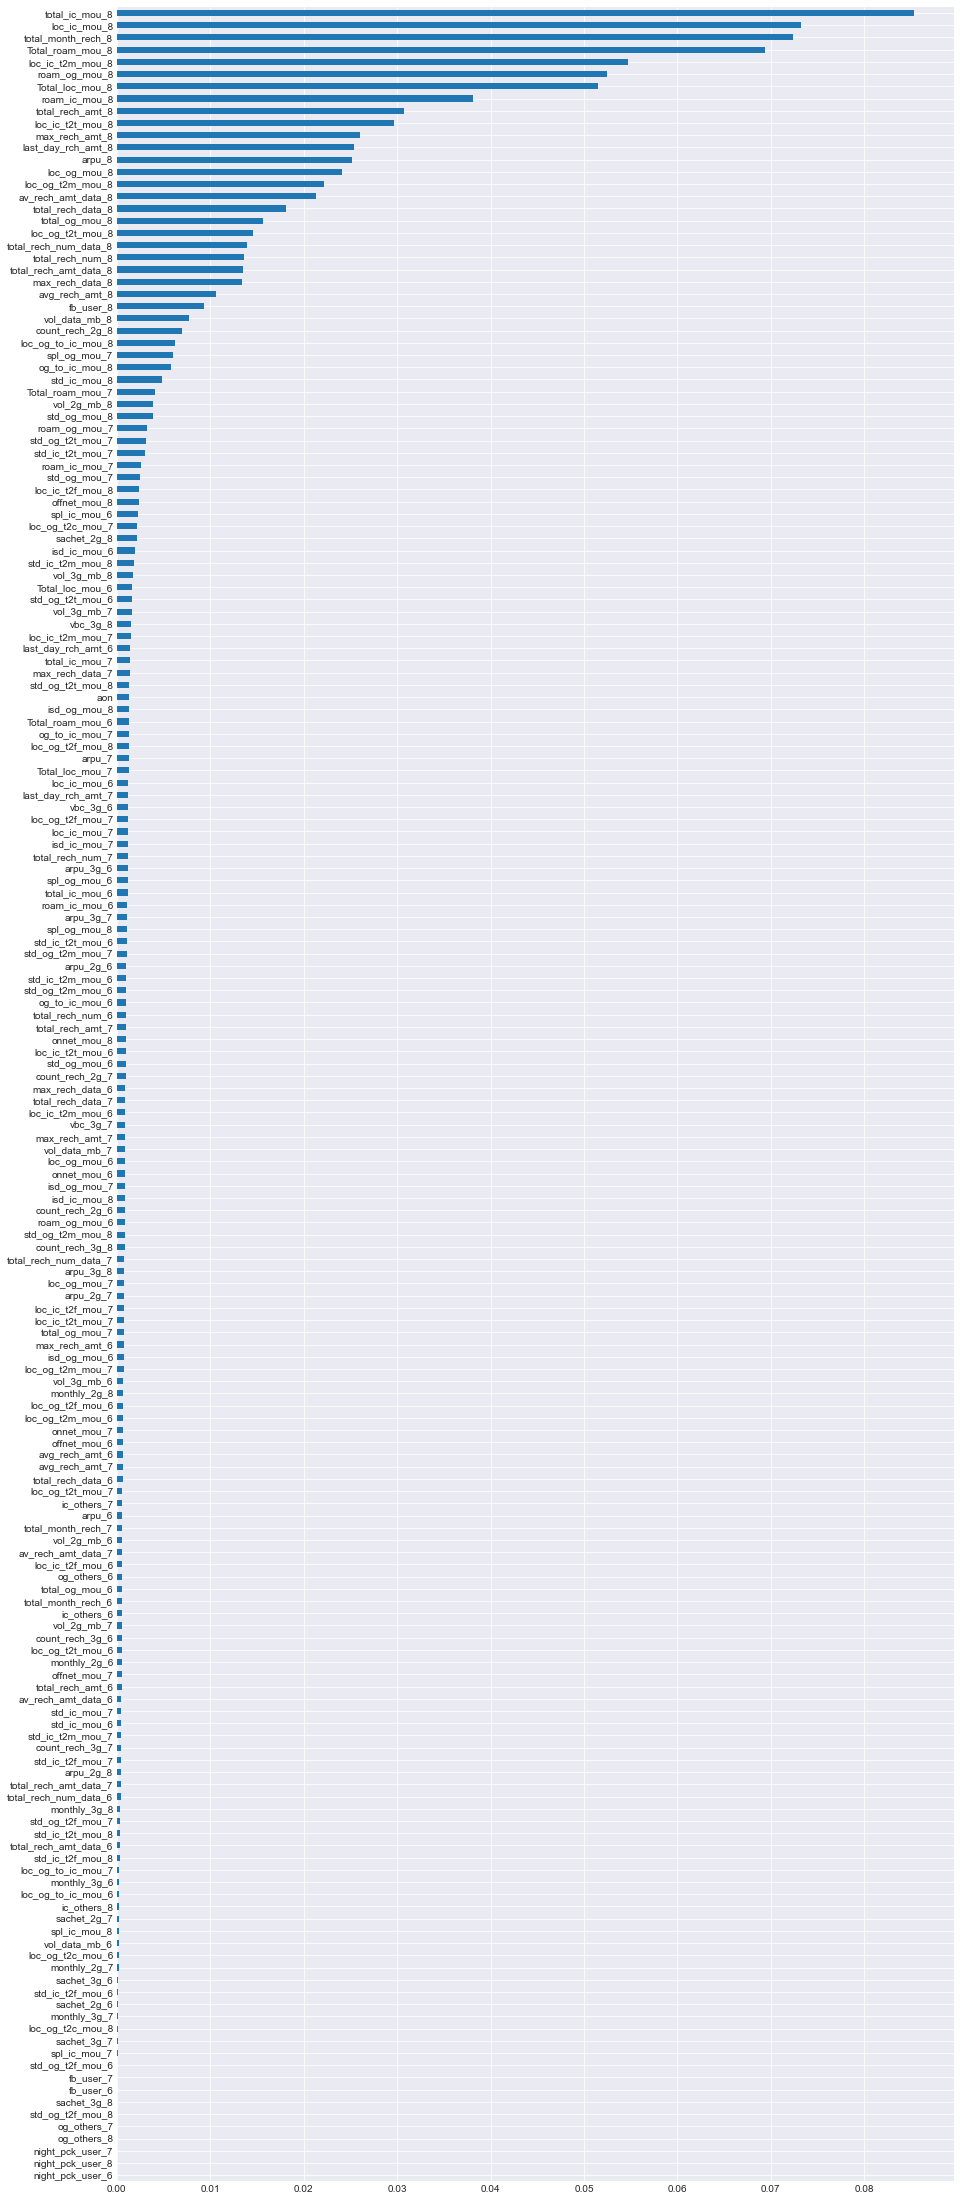

In [211]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

Some of the top main predictiors of churn are the monthly KPI features for the action phase (3rd month August).

the graph above suggest that the top 25 features ranked in order of importance as produced by our RandomForest implementation are the features that belong to month 8 i.e., the action month. Hence, it is clear that what happens in the action phase has a direct impact on the customer churn of high value customers. Specifically, these features are as follows:




1.	**total_ic_mou_8**		-- *Total incoming minutes of usage in month 8*
2.	**loc_ic_mou_8**		-- *local incoming minutes of usage in month 8*
3.	**total_month_rech_8**	-- *Total month recharge amount in month 8*	
4.	**total_roam_mou_8**	-- *Total incoming+outgoing roaming minutes of usage in month 8*
5.	**loc_ic_t2m_mou_8**	-- *local incoming calls to another operator minutes of usage in month 8*
6.	**roam_og_mou_8**		-- *outgoing roaming calls minutes of usage in month 8*
7.	**Total_loc_mou_8**		-- *Total local minutes of usage in month 8*
8.	**roam_ic_mou_8**		-- *incoming roaming calls minutes of usage in month 8*
9.	**total_rech_amt_8**	-- *total recharge amount in month 8*
10.	**loc_ic_t2t_mou_8**	-- *local incoming calls from same operator minutes of usage in month 8*
11.	**max_rech_amt_8**		-- *maximum recharge amount in month 8*
12.	**last_day_rch_amt_8**	-- *last (most recent) recharge amount in month 8*
13.	**arpu_8**				-- *average revenue per user in month 8*
14.	**loc_og_mou_8**		-- *local outgoing calls minutes of usage in month 8*
15.	**loc_og_t2n_mou_8**	-- *local outgoing calls minutes of usage to other operator mobile in month 8*
16.	**av_rech_amt_data_8**	-- *average recharge amount for mobile data in month 8*
17.	**total_rech_data_8**	-- *total data recharge (MB) in month 8*
18.	**total_og_t2t_mou_8**	-- *total outgoing calls from same operator minutes of usage in month 8*
19.	**total_rech_num_8**	-- *total number of recharges done in the month 8*
20.	**total_rech_amt_data_8**	-- *total recharge amount for data in month 8*
21.	**max_rech_data_8**		-- *maximum data recharge (MB) in month 8*
22.	**avg_rech_amt_8**		-- *average recharge amount in month 8*
23.	**fb_user_8**			-- *services of Facebook and similar social networking sites for month 8*
24.	**vol_data_mb_8**		-- *volume of data (MB) consumed for month 8*
25.	**count_rech_2g_8**		-- *Number of 2g data recharge in month 8*
26.	**loc_og_to_ic_mou_8**	-- *local outgoing to incoming mou ratio for month of 8*
27.	**spl_og_mou_7**		-- *Special outgoing call for the month of 7*

Local calls Mou's be it incoming or outgoing have a very important role for churn predictions. Reduction in these KPI's forms a clear indicator of churn.

Overall, drop in any of these indicator KPI is a signal that the customer is not actively engaging in the services offered by the Network operator and thus may choose to churn in the near future.

Next, we will look at some of the stratergic steps which can be taken to retain these predicted churners.

## Strategies to manage customer churn

It is a fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

#### Monitoring Drop in usage

Customer churn seems to be well predicted by drop in usage. 

Aside from using the Machine Learning model for predicting churn, the telecom company should pay close attention to drop in MoU, ARPU and data usage (2g and 3g) month over month. If feasible, the company should track these numbers week over week. Since billing cycles are typically monthly, a drop in usage numbers will give the company time to react when tracked at weekly level. 

Contact these customers proactively to find out what's affecting their experience. Perhaps, offer them coupons or other incentives to continue to use the services, while the company fixes the issues reported. 

Marketing team must come up with campaigns which targets these high-value to-be churner.

###### Improving Outgoing services

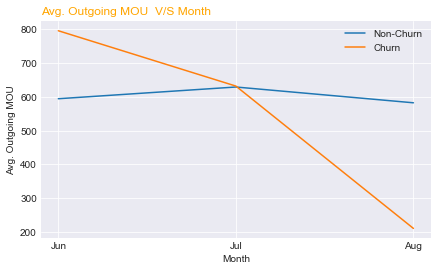

In [212]:
# Outgoing Mou
plot_byChurnMou(og_col,'Outgoing')

-  Initially, churner's outgoing usage was more than that of non-churners. Gradually they dropped there outgoing usage. May be these customers din't like the outgoing services offered to them or may be the call tariffs seemed expensive to them or may be the overall call quality, network coverage was not liked my them. This could be further investigated by the network service provider. 

Stratergy suggestions,
- The Network operators must futher investigate their outgoing tariffs, plans and campaigns.
- Might be that the outgoing tariffs offered to it's customer are less competitive to the outgoing tariffs of their competitor.
- New campaigns which targets the customers with high outgoing usage be rolled out.Like, 
    - Discounted outgoing rates during particular hours of the day for these customers.
    - For every X mou, grant customer with some % of X free mou.
    - Investigate and if need be revise the outgoing tarrifs to make it competitive.
    - Free monthly outgoing mou's depending on the users past roaming mou usage.

###### Improving Roaming services

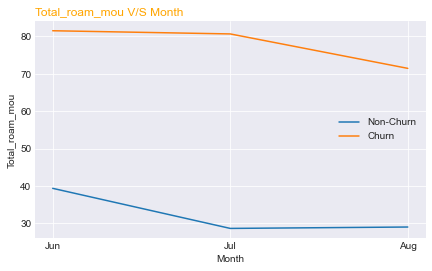

,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
churn,,,
0,39.360033,28.643301,29.016734
1,81.504156,80.651973,71.443623


In [213]:
plot_byChurn(hv_users,'Total_roam_mou')

Stratergy suggestions,
- Churners show higher roaming usage than non-churners.
- The Network operators must futher investigate their roaming tariffs, and quality of service.
- Might be that the roaming tariffs offered are less competitive than their competitor.
- It might be that the customer is not getting good quality of service while roaming. In this case, quality of service guarantees with roaming partners and network quality need to be investigated.
- New campaigns which targets the roaming customers can be rolled out. Like, 
    - Discounted roaming rates during particular hours of the day.
    - Free monthly roaming mou's depending on the users past roaming mou usage.